# Modifying flat file imports 


### Get data from CSVs

In [ ]:
# Import pandas as pd
import pandas as pd

# Read the CSV and assign it to the variable data
data = pd.read_csv('vt_tax_data_2016.csv')

# View the first few lines of data
data.head()

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAL,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01400,A01400,N01700,A01700,SCHF,...,N07230,A07230,N07240,A07240,N07220,A07220,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N09750,A09750,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,50,VT,0,1,111580,85090,14170,10740,45360,130630,26200,5900,2140,3760,860,1440,12620,30760,1314871,111570,1346018,82490,963138,23700,11699,14740,28241,13320,19296,1690,800,16620,113552,11790,10571,9940,55612,16860,137654,950,...,2100,1529,3910,647,1880,839,90,35,14140,19686,5100,18624,5020,17366,2690,1433,96880,181921,31090,59882,25370,52128,13020,14784,2880,2558,2530,2011,42510,29414,53660,50699,0,0,0,0,10820,9734,88260,138337
1,50,VT,0,2,82760,51960,18820,11310,35600,132950,32310,1670,840,830,30,680,13670,19160,3006587,82780,3066101,72330,2426615,20940,12790,13520,40635,12830,29294,7220,3592,12130,136240,10440,26072,8290,75651,13600,213453,940,...,4520,4809,12490,2434,13880,13041,960,622,10070,25291,7590,26044,8430,31171,5130,3154,80870,357207,12420,24615,9020,18327,8280,11187,2210,2005,1270,1286,71180,192875,74340,221146,0,0,0,0,12820,20029,68760,151729
2,50,VT,0,3,46270,19540,22650,3620,24140,91870,23610,170,0,170,0,0,4550,14920,2851399,46260,2906848,40370,2171527,18790,13201,11810,49417,10880,36257,10840,6784,8870,106641,9910,39322,6750,86142,10960,241188,330,...,2530,3432,2310,412,10480,15525,1780,1475,6760,19479,960,3912,1710,7384,900,905,45620,336580,0,0,0,0,570,759,2130,2140,0,0,44160,242908,44860,266097,0,0,0,0,10810,24499,34600,90583
3,50,VT,0,4,30070,5830,22190,960,16060,71610,18860,0,0,0,0,0,1880,10270,2617891,30050,2663815,26300,1931226,14670,11664,9180,46602,8590,35978,8360,6374,6280,93425,7330,43844,4840,81761,7730,208364,290,...,2270,3231,0,0,8260,13131,1170,1327,4770,15946,0,0,400,1607,110,189,29760,313992,0,0,0,0,0,0,1410,1455,0,0,29410,245476,29580,264678,0,0,0,0,7320,21573,21300,67045
4,50,VT,0,5,39530,3900,33800,590,22500,103710,30330,0,0,0,0,0,930,13600,5472982,39530,5574273,34740,3810688,24120,29196,17190,156496,16230,125983,14860,16227,8570,193032,14550,189103,7260,182370,10580,372597,0,...,2420,3719,0,0,6530,8430,1800,3309,6890,31938,0,0,0,0,0,0,39200,787504,0,0,0,0,0,0,2150,2223,0,0,39050,689575,39170,731963,40,24,0,0,12500,67761,23320,103034


### Get data from other flat files

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAL,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01400,A01400,N01700,A01700,SCHF,...,N07230,A07230,N07240,A07240,N07220,A07220,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N09750,A09750,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,50,VT,0,1,111580,85090,14170,10740,45360,130630,26200,5900,2140,3760,860,1440,12620,30760,1314871,111570,1346018,82490,963138,23700,11699,14740,28241,13320,19296,1690,800,16620,113552,11790,10571,9940,55612,16860,137654,950,...,2100,1529,3910,647,1880,839,90,35,14140,19686,5100,18624,5020,17366,2690,1433,96880,181921,31090,59882,25370,52128,13020,14784,2880,2558,2530,2011,42510,29414,53660,50699,0,0,0,0,10820,9734,88260,138337
1,50,VT,0,2,82760,51960,18820,11310,35600,132950,32310,1670,840,830,30,680,13670,19160,3006587,82780,3066101,72330,2426615,20940,12790,13520,40635,12830,29294,7220,3592,12130,136240,10440,26072,8290,75651,13600,213453,940,...,4520,4809,12490,2434,13880,13041,960,622,10070,25291,7590,26044,8430,31171,5130,3154,80870,357207,12420,24615,9020,18327,8280,11187,2210,2005,1270,1286,71180,192875,74340,221146,0,0,0,0,12820,20029,68760,151729
2,50,VT,0,3,46270,19540,22650,3620,24140,91870,23610,170,0,170,0,0,4550,14920,2851399,46260,2906848,40370,2171527,18790,13201,11810,49417,10880,36257,10840,6784,8870,106641,9910,39322,6750,86142,10960,241188,330,...,2530,3432,2310,412,10480,15525,1780,1475,6760,19479,960,3912,1710,7384,900,905,45620,336580,0,0,0,0,570,759,2130,2140,0,0,44160,242908,44860,266097,0,0,0,0,10810,24499,34600,90583
3,50,VT,0,4,30070,5830,22190,960,16060,71610,18860,0,0,0,0,0,1880,10270,2617891,30050,2663815,26300,1931226,14670,11664,9180,46602,8590,35978,8360,6374,6280,93425,7330,43844,4840,81761,7730,208364,290,...,2270,3231,0,0,8260,13131,1170,1327,4770,15946,0,0,400,1607,110,189,29760,313992,0,0,0,0,0,0,1410,1455,0,0,29410,245476,29580,264678,0,0,0,0,7320,21573,21300,67045
4,50,VT,0,5,39530,3900,33800,590,22500,103710,30330,0,0,0,0,0,930,13600,5472982,39530,5574273,34740,3810688,24120,29196,17190,156496,16230,125983,14860,16227,8570,193032,14550,189103,7260,182370,10580,372597,0,...,2420,3719,0,0,6530,8430,1800,3309,6890,31938,0,0,0,0,0,0,39200,787504,0,0,0,0,0,0,2150,2223,0,0,39050,689575,39170,731963,40,24,0,0,12500,67761,23320,103034


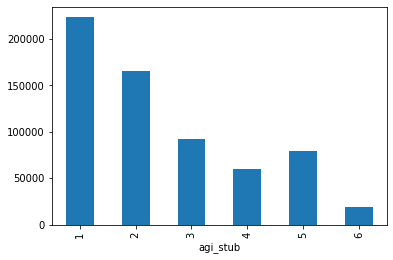

In [ ]:
# Import pandas with the alias pd
import pandas as pd
import matplotlib.pyplot as plt

# Load TSV using the sep keyword argument to set delimiter
data = pd.read_csv('vt_tax_data_2016.csv')
display(data.head())
# Plot the total number of tax returns by income group
counts = data.groupby("agi_stub").N1.sum()
counts.plot.bar()
plt.show()

### Import a subset of columns

In [ ]:
# Create list of columns to use
cols = ["zipcode", "agi_stub", "mars1", "MARS2", "NUMDEP"]

# Create data frame from csv using only selected columns
data = pd.read_csv("vt_tax_data_2016.csv", usecols=cols)
display(data.head())

# View counts of dependents and tax returns by income level
print(data.groupby("agi_stub").sum())

,zipcode,agi_stub,mars1,MARS2,NUMDEP
0,0,1,85090,14170,26200
1,0,2,51960,18820,32310
2,0,3,19540,22650,23610
3,0,4,5830,22190,18860
4,0,5,3900,33800,30330


          zipcode   mars1  MARS2  NUMDEP
agi_stub                                
1         1439444  170320  28480   52490
2         1439444  104000  37690   64660
3         1439444   39160  45390   47330
4         1439444   11670  44410   37760
5         1439444    7820  67750   60730
6         1439444    1210  16340   16300


### Import a file in chunks

In [ ]:
vt_data_first500 = pd.read_csv('vt_tax_data_2016.csv', nrows=500) 
print(vt_data_first500.shape) 

(500, 147)


In [ ]:
# Create data frame of next 500 rows with labeled columns
vt_data_next500 = pd.read_csv("vt_tax_data_2016.csv", 
                       		  nrows=500,
                       		  skiprows=5,
                       		  header=None,
                       		  names = list(vt_data_first500.columns))

# View the Vermont data frames to confirm they're different
print(vt_data_first500.head(7))
print(vt_data_next500.head(10))

   STATEFIPS STATE  zipcode  agi_stub  ...  N11901  A11901  N11902  A11902
0         50    VT        0         1  ...   10820    9734   88260  138337
1         50    VT        0         2  ...   12820   20029   68760  151729
2         50    VT        0         3  ...   10810   24499   34600   90583
3         50    VT        0         4  ...    7320   21573   21300   67045
4         50    VT        0         5  ...   12500   67761   23320  103034
5         50    VT        0         6  ...    3900   93123    2870   39425
6         50    VT     5001         1  ...     120     102    1080    1662

[7 rows x 147 columns]
   STATEFIPS STATE  zipcode  agi_stub  ...  N11901  A11901  N11902  A11902
0         50    VT        0         5  ...   12500   67761   23320  103034
1         50    VT        0         6  ...    3900   93123    2870   39425
2         50    VT     5001         1  ...     120     102    1080    1662
3         50    VT     5001         2  ...     160     269     890    1814
4

# Handling errors and missing data 

Column data types are wrong 

Values are missing 

Records that cannot be read by pandas

### Specify data types

In [ ]:
# Create dict specifying data types for agi_stub and zipcode
data_types = {'agi_stub': 'category',
			  'zipcode':'str'}

# Load csv using dtype to set correct data types
data = pd.read_csv("vt_tax_data_2016.csv", dtype = data_types)

# Print data types of resulting frame
print(data.dtypes.head())
print(vt_data_next500.dtypes.head())

STATEFIPS       int64
STATE          object
zipcode        object
agi_stub     category
N1              int64
dtype: object
STATEFIPS     int64
STATE        object
zipcode       int64
agi_stub      int64
N1            int64
dtype: object


### Set custom NA values

In [ ]:
data

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,PREP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAL,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01400,A01400,N01700,A01700,SCHF,...,N07230,A07230,N07240,A07240,N07220,A07220,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N09750,A09750,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902
0,50,VT,0,1,111580,85090,14170,10740,45360,130630,26200,5900,2140,3760,860,1440,12620,30760,1314871,111570,1346018,82490,963138,23700,11699,14740,28241,13320,19296,1690,800,16620,113552,11790,10571,9940,55612,16860,137654,950,...,2100,1529,3910,647,1880,839,90,35,14140,19686,5100,18624,5020,17366,2690,1433,96880,181921,31090,59882,25370,52128,13020,14784,2880,2558,2530,2011,42510,29414,53660,50699,0,0,0,0,10820,9734,88260,138337
1,50,VT,0,2,82760,51960,18820,11310,35600,132950,32310,1670,840,830,30,680,13670,19160,3006587,82780,3066101,72330,2426615,20940,12790,13520,40635,12830,29294,7220,3592,12130,136240,10440,26072,8290,75651,13600,213453,940,...,4520,4809,12490,2434,13880,13041,960,622,10070,25291,7590,26044,8430,31171,5130,3154,80870,357207,12420,24615,9020,18327,8280,11187,2210,2005,1270,1286,71180,192875,74340,221146,0,0,0,0,12820,20029,68760,151729
2,50,VT,0,3,46270,19540,22650,3620,24140,91870,23610,170,0,170,0,0,4550,14920,2851399,46260,2906848,40370,2171527,18790,13201,11810,49417,10880,36257,10840,6784,8870,106641,9910,39322,6750,86142,10960,241188,330,...,2530,3432,2310,412,10480,15525,1780,1475,6760,19479,960,3912,1710,7384,900,905,45620,336580,0,0,0,0,570,759,2130,2140,0,0,44160,242908,44860,266097,0,0,0,0,10810,24499,34600,90583
3,50,VT,0,4,30070,5830,22190,960,16060,71610,18860,0,0,0,0,0,1880,10270,2617891,30050,2663815,26300,1931226,14670,11664,9180,46602,8590,35978,8360,6374,6280,93425,7330,43844,4840,81761,7730,208364,290,...,2270,3231,0,0,8260,13131,1170,1327,4770,15946,0,0,400,1607,110,189,29760,313992,0,0,0,0,0,0,1410,1455,0,0,29410,245476,29580,264678,0,0,0,0,7320,21573,21300,67045
4,50,VT,0,5,39530,3900,33800,590,22500,103710,30330,0,0,0,0,0,930,13600,5472982,39530,5574273,34740,3810688,24120,29196,17190,156496,16230,125983,14860,16227,8570,193032,14550,189103,7260,182370,10580,372597,0,...,2420,3719,0,0,6530,8430,1800,3309,6890,31938,0,0,0,0,0,0,39200,787504,0,0,0,0,0,0,2150,2223,0,0,39050,689575,39170,731963,40,24,0,0,12500,67761,23320,103034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,50,VT,99999,2,2010,1300,410,240,970,3090,680,90,60,30,0,50,290,570,72718,2010,74023,1710,56356,510,151,300,826,260,576,150,54,260,2474,210,550,150,1009,350,5112,40,...,90,64,210,34,240,209,20,4,190,439,160,432,170,500,110,56,1950,8725,260,480,180,332,150,164,30,21,30,18,1730,4780,1820,5539,0,0,0,0,250,291,1630,3506
1472,50,VT,99999,3,1070,500,460,90,590,1930,390,0,0,0,0,0,110,390,65331,1070,66533,890,46304,410,175,240,626,230,450,190,98,190,2485,170,265,100,857,230,4843,0,...,0,0,30,5,120,158,0,0,140,429,0,0,0,0,0,0,1050,8056,0,0,0,0,0,0,0,0,0,0,1040,5939,1050,6710,0,0,0,0,230,489,750,1829
1473,50,VT,99999,4,650,170,450,30,370,1410,310,0,0,0,0,0,40,270,55753,650,56297,540,38050,300,128,170,555,160,451,150,89,100,551,150,334,90,1106,140,2938,20,...,30,38,0,0,90,124,20,4,80,134,0,0,0,0,0,0,630,6827,0,0,0,0,0,0,20,20,0,0,630,5563,630,6003,0,0,0,0,150,305,390,1055
1474,50,VT,99999,5,750,120,620,30,470,1830,440,0,0,0,0,0,30,340,99716,750,101058,620,63724,460,381,310,2401,300,2000,270,222,130,2416,280,1544,140,1816,220,6488,0,...,0,0,0,0,60,75,0,0,110,399,0,0,0,0,0,0,740,14122,0,0,0,0,0,0,0,0,0,0,740

In [ ]:
# Create dict specifying that 0s in zipcode are NA values
null_values = {'zipcode': 0}

# Load csv using na_values keyword argument
data = pd.read_csv("vt_tax_data_2016.csv", 
                   na_values = null_values)

# View rows with NA ZIP codes
print(data[data.zipcode.isna()])

   STATEFIPS STATE  zipcode  agi_stub  ...  N11901  A11901  N11902  A11902
0         50    VT      NaN         1  ...   10820    9734   88260  138337
1         50    VT      NaN         2  ...   12820   20029   68760  151729
2         50    VT      NaN         3  ...   10810   24499   34600   90583
3         50    VT      NaN         4  ...    7320   21573   21300   67045
4         50    VT      NaN         5  ...   12500   67761   23320  103034
5         50    VT      NaN         6  ...    3900   93123    2870   39425

[6 rows x 147 columns]


### Skip bad data

In [ ]:
pd.read_csv("corrupt.csv")

ParserError: ignored

In [ ]:
try:
  # Set warn_bad_lines to issue warnings about bad records
    data = pd.read_csv("corrupt.csv", 
                     error_bad_lines=False, 
                     warn_bad_lines = True)

  # View first 5 records
    print(data.head(10))
except pd.io.common.CParserError:
    print("Your data contained rows that could not be parsed.")

  FirstName  LastName Team Position  JerseyNumber     Salary   Birthdate
0       Joe  Pavelski   SJ        C             8  6000000.0  1984-07-11
1   Sidney     Crosby  PIT        C            87  8700000.0  1987-08-07
2    Daniel     Sedin  VAN       LW            22        NaN  1980-09-26
3    Henrik     Sedin  VAN        C            33        NaN  1980-09-26
4   Sidney     Crosby  PIT        C            87  8700000.0  1987-08-07


b'Skipping line 3: expected 7 fields, saw 8\nSkipping line 5: expected 7 fields, saw 9\n'


## Importing Data From Excel Files

### Get data from a spreadsheet

In [ ]:
# Load pandas as pd
import pandas as pd

# Read spreadsheet and assign it to survey_responses
survey_responses = pd.read_excel('fcc_survey.xlsx')

# View the head of the data frame
print(survey_responses.head())

### Load a portion of a spreadsheet

In [ ]:
# Create string of lettered columns to load
col_string = "AD, AW:BA"

# Load data with skiprows and usecols set
survey_responses = pd.read_excel("fcc-new-coder-survey.xlsx", 
                                 skiprows=2, 
                                 usecols=col_string)

# View the names of the columns selected
print(survey_responses.columns)

Index(['ExpectedEarning', 'JobApplyWhen', 'JobPref', 'JobRelocateYesNo',
       'JobRoleInterest', 'JobWherePref'],
      dtype='object')


### Select a single sheet

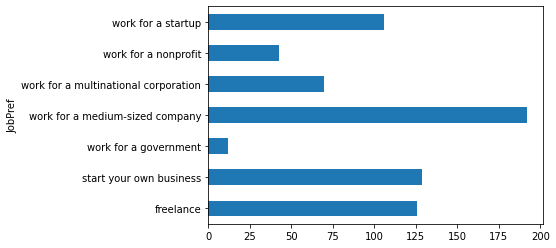

In [ ]:
# Create df from second worksheet by referencing its position
responses_2017 = pd.read_excel("fcc-new-coder-survey.xlsx",skiprows=2,
                               sheet_name = '2017')
# Graph where people would like to get a developer job
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()

# Getting data from multiple worksheets 

### Select multiple sheets

In [ ]:
# Load both the 2016 and 2017 sheets by name
all_survey_data = pd.read_excel("fcc-new-coder-survey.xlsx",
                                sheet_name=['2016', '2017'])

# View the data type of all_survey_data
print(type(all_survey_data))
print(all_survey_data)

<class 'dict'>
{'2016':       FreeCodeCamp New Developer Survey Responses, 2016  ...     Unnamed: 97
0     Source: https://www.kaggle.com/freecodecamp/20...  ...             NaN
1                                                   Age  ...  StudentDebtOwe
2                                                    28  ...           20000
3                                                    22  ...             NaN
4                                                    19  ...             NaN
...                                                 ...  ...             ...
997                                                  35  ...             NaN
998                                                  19  ...             NaN
999                                                  25  ...             NaN
1000                                                 28  ...            5500
1001                                                 39  ...             NaN

[1002 rows x 98 columns], '2017':       FreeCodeCam

In [ ]:
# Load all sheets in the Excel file
all_survey_data = pd.read_excel("fcc-new-coder-survey.xlsx",
                                sheet_name = [0, '2017'])

# View the sheet names in all_survey_data
print(all_survey_data.keys())
print(all_survey_data)

dict_keys([0, '2017'])
{0:       FreeCodeCamp New Developer Survey Responses, 2016  ...     Unnamed: 97
0     Source: https://www.kaggle.com/freecodecamp/20...  ...             NaN
1                                                   Age  ...  StudentDebtOwe
2                                                    28  ...           20000
3                                                    22  ...             NaN
4                                                    19  ...             NaN
...                                                 ...  ...             ...
997                                                  35  ...             NaN
998                                                  19  ...             NaN
999                                                  25  ...             NaN
1000                                                 28  ...            5500
1001                                                 39  ...             NaN

[1002 rows x 98 columns], '2017':       FreeCode

In [ ]:
# Load all sheets in the Excel file
all_survey_data = pd.read_excel("fcc-new-coder-survey.xlsx", skiprows=2,
                                sheet_name = None)

# View the sheet names in all_survey_data
print(all_survey_data.keys())

dict_keys(['2016', '2017'])


### Work with multiple spreadsheets

Adding 1000 rows
Adding 1000 rows


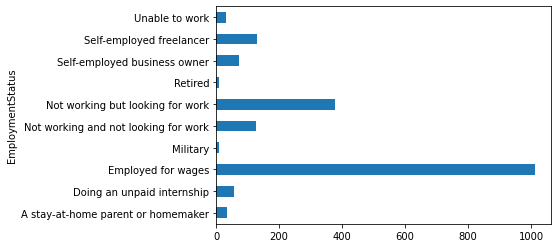

In [ ]:
# Create an empty data frame
all_responses = pd.DataFrame()

# Set up for loop to iterate through values in responses
for key,df in all_survey_data.items():
  # Print the number of rows being added
  df["Year"] = key
  print("Adding {} rows".format(df.shape[0]))
  # Append df to all_responses, assign result
  all_responses = all_responses.append(df)

# Graph employment statuses in sample
counts = all_responses.groupby("EmploymentStatus").EmploymentStatus.count()
counts.plot.barh()
plt.show()

### Set Boolean columns

In [ ]:
survey_data = pd.read_excel("fcc-new-coder-survey.xlsx",skiprows=2)
print(survey_data.isna().sum().head(50))
print(survey_data.dtypes.head(50))

Age                                13
AttendedBootcamp                    6
BootcampFinish                    965
BootcampLoanYesNo                 964
BootcampName                      968
BootcampRecommend                 964
ChildrenNumber                    790
CityPopulation                     12
CodeEventConferences              717
CodeEventDjangoGirls             1000
CodeEventGameJam                 1000
CodeEventGirlDev                  966
CodeEventHackathons               808
CodeEventMeetup                  1000
CodeEventNodeSchool               948
CodeEventNone                     875
CodeEventOther                   1000
CodeEventRailsBridge              985
CodeEventRailsGirls              1000
CodeEventStartUpWknd              936
CodeEventWomenCode                954
CodeEventWorkshop                1000
CommuteTime                       415
CountryCitizen                     18
CountryLive                        21
EmploymentField                   474
EmploymentFi

In [ ]:
import numpy as np

# Set dtype to load appropriate column(s) as Boolean data
survey_data = pd.read_excel("fcc-new-coder-survey.xlsx",skiprows=2,
                            dtype = {'IsSoftwareDev': np.bool})
print(survey_data.dtypes.head(50))
# View financial burdens by Boolean group
print(survey_data.groupby('IsSoftwareDev').sum())

Age                              float64
AttendedBootcamp                 float64
BootcampFinish                   float64
BootcampLoanYesNo                float64
BootcampName                      object
BootcampRecommend                float64
ChildrenNumber                   float64
CityPopulation                    object
CodeEventConferences             float64
CodeEventDjangoGirls             float64
CodeEventGameJam                 float64
CodeEventGirlDev                 float64
CodeEventHackathons              float64
CodeEventMeetup                  float64
CodeEventNodeSchool              float64
CodeEventNone                    float64
CodeEventOther                   float64
CodeEventRailsBridge             float64
CodeEventRailsGirls              float64
CodeEventStartUpWknd             float64
CodeEventWomenCode               float64
CodeEventWorkshop                float64
CommuteTime                      float64
CountryCitizen                    object
CountryLive     

### Set custom true/false values

In [ ]:
# Load file with Yes as a True value and No as a False value
survey_subset = pd.read_excel("fcc-new-coder-survey.xlsx",skiprows=2, keep_default_na=False,
                              dtype={"HasDebt": bool,
                              "AttendedBootcamp": bool},
                              true_values=["Yes", np.nan, 0, "ok"],
                              false_values=["No"])

# View the data
print(survey_subset[["HasDebt","AttendedBootcamp"]])

     HasDebt  AttendedBootcamp
0       True             False
1      False             False
2      False             False
3       True             False
4       True             False
..       ...               ...
995     True             False
996    False             False
997    False             False
998     True             False
999    False             False

[1000 rows x 2 columns]


### Parse simple dates

In [ ]:
# Load file, with Part1StartTime parsed as datetime data
survey_data = pd.read_excel("fcc-new-coder-survey.xlsx",skiprows=2,
                            parse_dates = ['Part1EndTime'])

# Print first few values of Part1StartTime
print(survey_data.Part1StartTime.head())
print(survey_data.dtypes.tail(50))

0    2016-03-29 21:23:13
1    2016-03-29 21:24:59
2    2016-03-29 21:25:37
3    2016-03-29 21:21:37
4    2016-03-29 21:26:22
Name: Part1StartTime, dtype: object
JobApplyWhen                           object
JobPref                                object
JobRelocateYesNo                      float64
JobRoleInterest                        object
JobWherePref                           object
LanguageAtHome                         object
MaritalStatus                          object
MoneyForLearning                      float64
MonthsProgramming                     float64
NetworkID                              object
Part1EndTime                   datetime64[ns]
Part1StartTime                         object
Part2EndTime                           object
Part2StartTime                         object
PodcastChangeLog                      float64
PodcastCodeNewbie                     float64
PodcastDeveloperTea                   float64
PodcastDotNetRocks                    float64
PodcastJsAi

### Get datetimes from multiple columns

In [ ]:
# Create dict of columns to combine into new datetime column
datetime_cols = {"Part2Start": ['Part2EndTime', 'Part2StartTime']}


# Load file, supplying the dict to parse_dates
survey_data = pd.read_excel("fcc-new-coder-survey.xlsx",skiprows=2,
                            parse_dates = datetime_cols)

# View summary statistics about Part2Start
print(survey_data.Part2Start.describe())

count                                        1000
unique                                       1000
top       2016-03-30 00:25:47 2016-03-30 00:24:12
freq                                            1
Name: Part2Start, dtype: object


### Parse non-standard date formats

In [ ]:
survey_data.columns

Index(['Part2Start', 'Age', 'AttendedBootcamp', 'BootcampFinish',
       'BootcampLoanYesNo', 'BootcampName', 'BootcampRecommend',
       'ChildrenNumber', 'CityPopulation', 'CodeEventConferences',
       'CodeEventDjangoGirls', 'CodeEventGameJam', 'CodeEventGirlDev',
       'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool',
       'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge',
       'CodeEventRailsGirls', 'CodeEventStartUpWknd', 'CodeEventWomenCode',
       'CodeEventWorkshop', 'CommuteTime', 'CountryCitizen', 'CountryLive',
       'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus',
       'EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting',
       'Gender', 'HasChildren', 'HasDebt', 'HasFinancialDependents',
       'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary',
       'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'ID.x', 'ID.y',
       'Income', 'IsEthnicMinority', 'IsReceiveDisabilitiesBenefits',
       '

In [ ]:
# Parse datetimes and assign result back to Part2EndTime
survey_data["Part1EndTime"] = pd.to_datetime(survey_data["Part1EndTime"], 
                                             format="%Y-%m-%d %H:%M:%S")

# Print first few values of Part2EndTime
print(survey_data["Part1EndTime"].head())

0   2016-03-29 21:24:53
1   2016-03-29 21:27:09
2   2016-03-29 21:27:11
3   2016-03-29 21:28:47
4   2016-03-29 21:29:27
Name: Part1EndTime, dtype: datetime64[ns]


In [ ]:
"%Y-%m-%d %H:%M:%S"

## Importing Data from Databases

### Connect to a database

In [ ]:
# Import sqlalchemy's create_engine() function
from sqlalchemy import create_engine
import matplotlib.pyplot as plt


# Create the database engine
engine = create_engine('sqlite:///data.db')

# View the tables in the database
print(engine.table_names())

['boro_census', 'hpd311calls', 'weather']


### Load entire tables

In [ ]:
# Load libraries
import pandas as pd
from sqlalchemy import create_engine

# Create the database engine
engine = create_engine('sqlite:///data.db')

# Load hpd311calls without any SQL
hpd_calls = pd.read_sql('hpd311calls',  engine)

# View the first few rows of data
print(hpd_calls.head())

  unique_key created_date  ... community_board    borough
0   38070822   01/01/2018  ...        07 BRONX      BRONX
1   38065299   01/01/2018  ...    03 MANHATTAN  MANHATTAN
2   38066653   01/01/2018  ...        04 BRONX      BRONX
3   38070264   01/01/2018  ...    12 MANHATTAN  MANHATTAN
4   38072466   01/01/2018  ...     08 BROOKLYN   BROOKLYN

[5 rows x 8 columns]


In [ ]:
# Create the database engine
engine = create_engine("sqlite:///data.db")

# Create a SQL query to load the entire weather table
query = """
SELECT * 
  FROM weather;
"""

# Load weather with the SQL query
weather = pd.read_sql(query, engine)

# View the first few rows of data
print(weather.head())

       station                         name  latitude  ...  tavg  tmax tmin
0  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  ...          52   42
1  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  ...          48   39
2  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  ...          48   42
3  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  ...          51   40
4  USW00094728  NY CITY CENTRAL PARK, NY US  40.77898  ...          61   50

[5 rows x 13 columns]


### Selecting columns with SQL

In [ ]:
# Create database engine for data.db
engine = create_engine('sqlite:///data.db')

# Write query to get date, tmax, and tmin from weather
query = "SELECT date, tmax, tmin FROM weather;"

# Make a data frame by passing query and engine to read_sql()
temperatures = pd.read_sql(query, engine)

# View the resulting data frame
print(temperatures)

           date  tmax  tmin
0    12/01/2017    52    42
1    12/02/2017    48    39
2    12/03/2017    48    42
3    12/04/2017    51    40
4    12/05/2017    61    50
..          ...   ...   ...
116  03/27/2018    47    34
117  03/28/2018    52    38
118  03/29/2018    53    49
119  03/30/2018    62    44
120  03/31/2018    58    39

[121 rows x 3 columns]


### Selecting rows

,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough
0,38078679,01/01/2018,HPD,SAFETY,11221,192 MALCOLM X BOULEVARD,03 BROOKLYN,BROOKLYN
1,38077515,01/01/2018,HPD,SAFETY,11225,410 EASTERN PARKWAY,09 BROOKLYN,BROOKLYN
2,38073165,01/01/2018,HPD,SAFETY,10457,1975 BATHGATE AVENUE,06 BRONX,BRONX
3,38081081,01/01/2018,HPD,SAFETY,10457,1515 SELWYN AVENUE,04 BRONX,BRONX
4,38081146,01/01/2018,HPD,SAFETY,10457,1515 SELWYN AVENUE,04 BRONX,BRONX


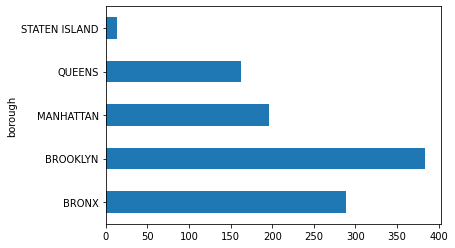

In [ ]:
# Create query to get hpd311calls records about safety
query = """SELECT *
		     FROM hpd311calls
            WHERE complaint_type = 'SAFETY';"""

# Query the database and assign result to safety_calls
safety_calls = pd.read_sql(query, engine)

display(safety_calls.head())

# Graph the number of safety calls by borough
call_counts = safety_calls.groupby('borough').unique_key.count()
call_counts.plot.barh()
plt.show()

### Filtering on multiple conditions

In [ ]:
# Create query for records with max temps <= 32 or snow >= 1
query = """
SELECT *
  FROM weather
WHERE tmax <= 32 OR
snow >=1;
"""

# Query database and assign result to wintry_days
wintry_days = pd.read_sql(query, engine)

# View summary stats about the temperatures
print(wintry_days.describe())

           latitude     longitude  ...       tmax       tmin
count  2.500000e+01  2.500000e+01  ...  25.000000  25.000000
mean   4.077898e+01 -7.396925e+01  ...  27.320000  17.160000
std    2.175584e-14  4.351168e-14  ...   7.122266   7.673982
min    4.077898e+01 -7.396925e+01  ...  13.000000   5.000000
25%    4.077898e+01 -7.396925e+01  ...  22.000000  11.000000
50%    4.077898e+01 -7.396925e+01  ...  28.000000  17.000000
75%    4.077898e+01 -7.396925e+01  ...  31.000000  20.000000
max    4.077898e+01 -7.396925e+01  ...  40.000000  33.000000

[8 rows x 8 columns]


### Getting distinct values

In [ ]:
# Create query for unique combinations of borough and complaint_type
query = """
SELECT DISTINCT borough, 
       complaint_type
  FROM hpd311calls;
"""

# Load results of query to a data frame
issues_and_boros = pd.read_sql(query, engine)

# Check assumption about issues and boroughs
print(issues_and_boros)

          borough    complaint_type
0           BRONX    HEAT/HOT WATER
1       MANHATTAN          PLUMBING
2       MANHATTAN    HEAT/HOT WATER
3        BROOKLYN    HEAT/HOT WATER
4          QUEENS    HEAT/HOT WATER
..            ...               ...
60      MANHATTAN  OUTSIDE BUILDING
61      MANHATTAN          ELEVATOR
62       BROOKLYN  OUTSIDE BUILDING
63  STATEN ISLAND            SAFETY
64  STATEN ISLAND  OUTSIDE BUILDING

[65 rows x 2 columns]


### Counting in groups

,complaint_type,COUNT(*)
0,APPLIANCE,1307
1,DOOR/WINDOW,4451
2,ELECTRIC,2777
3,ELEVATOR,106
4,FLOORING/STAIRS,2190


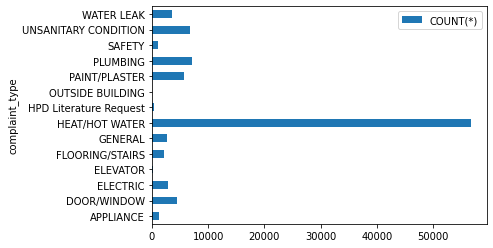

In [ ]:
# Create query to get call counts by complaint_type
query = """
SELECT complaint_type, 
COUNT(*)
  FROM hpd311calls
GROUP BY complaint_type;
"""

# Create data frame of call counts by issue
calls_by_issue = pd.read_sql(query, engine)

display(calls_by_issue.head())

# Graph the number of calls for each housing issue
calls_by_issue.plot.barh(x="complaint_type")
plt.show()

### Working with aggregate functions

In [ ]:
# Create query to get temperature and precipitation by month
query = """
SELECT month, 
        MAX(tmax), 
        MIN(tmin),
        SUM(prcp)
  FROM weather 
 GROUP BY month;
"""

# Get data frame of monthly weather stats
weather_by_month = pd.read_sql(query, engine)

# View weather stats by month
print(weather_by_month)

      month  MAX(tmax)  MIN(tmin)  SUM(prcp)
0  December         61          9       2.21
1  February         78         16       5.83
2   January         61          5       2.18
3     March         62         27       5.17


### Joining tables

In [ ]:
# Query to join weather to call records by date columns
query = """
SELECT * 
  FROM hpd311calls
  JOIN weather
  ON hpd311calls.created_date = weather.date;
"""

# Create data frame of joined tables
calls_with_weather = pd.read_sql(query, engine)

# View the data frame to make sure all columns were joined
print(calls_with_weather.head())

  unique_key created_date agency  complaint_type  ... snow tavg tmax tmin
0   38070822   01/01/2018    HPD  HEAT/HOT WATER  ...  0.0        19    7
1   38065299   01/01/2018    HPD        PLUMBING  ...  0.0        19    7
2   38066653   01/01/2018    HPD  HEAT/HOT WATER  ...  0.0        19    7
3   38070264   01/01/2018    HPD  HEAT/HOT WATER  ...  0.0        19    7
4   38072466   01/01/2018    HPD  HEAT/HOT WATER  ...  0.0        19    7

[5 rows x 21 columns]


### Joining and filtering

In [ ]:
# Query to get water leak calls and daily precipitation
query = """
SELECT hpd311calls.*, weather.prcp
  FROM hpd311calls
  JOIN weather
    ON hpd311calls.created_date = weather.date
 WHERE hpd311calls.complaint_type = 'WATER LEAK';
"""

# Load query results into the leak_calls data frame
leak_calls = pd.read_sql(query, engine)

# View the data frame
print(leak_calls.head())

  unique_key created_date agency  ... community_board   borough prcp
0   38074305   01/01/2018    HPD  ...     17 BROOKLYN  BROOKLYN  0.0
1   38078748   01/01/2018    HPD  ...        07 BRONX     BRONX  0.0
2   38081097   01/01/2018    HPD  ...     03 BROOKLYN  BROOKLYN  0.0
3   38077874   01/01/2018    HPD  ...       09 QUEENS    QUEENS  0.0
4   38081110   01/01/2018    HPD  ...       10 QUEENS    QUEENS  0.0

[5 rows x 9 columns]


### Joining, filtering, and aggregating

In [ ]:
# Modify query to join tmax and tmin from weather by date
query = """
SELECT created_date, 
       COUNT(*), 
       weather.tmax, 
       weather.tmin
  FROM hpd311calls 
       JOIN weather w
       ON hpd311calls.created_date = w.date
 WHERE complaint_type = 'HEAT/HOT WATER' 
 GROUP BY created_date;"""

# Query database and save results as df
df = pd.read_sql(query, engine)

# View first 5 records
print(df.head())

  created_date  COUNT(*)  tmax  tmin
0   01/01/2018      4597    19     7
1   01/02/2018      4362    26    13
2   01/03/2018      3045    30    16
3   01/04/2018      3374    29    19
4   01/05/2018      4333    19     9


## Importing JSON Data and Working with APIs

### Load JSON data

In [ ]:
import pandas as pd

df = pd.read_csv("dhs-daily-report.csv")
df.to_json ("dhs_daily_report.json")

In [ ]:
# Load pandas as pd
import pandas as pd
import matplotlib.pyplot as plt


# Load the daily report to a data frame
pop_in_shelters = pd.read_json('dhs_daily_report.json')

# View summary stats about pop_in_shelters
print(pop_in_shelters.columns)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


AttributeError: ignored

In [ ]:
df = pd.read_json("dhs_daily_report.json",orient = 'split')

### Work with JSON orientations

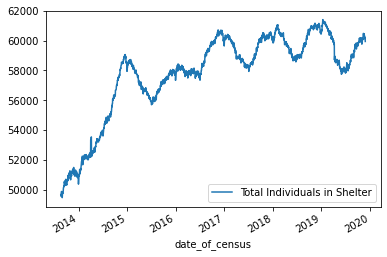

In [ ]:
#asif
try:
    # Load the JSON with orient specified
    df = pd.read_json("dhs_daily_report.json",
                      orient = 'split')
    
    # Plot total population in shelters over time
    df["date_of_census"] = pd.to_datetime(df["Date of Census"])
    df.plot(x="date_of_census", 
            y="Total Individuals in Shelter")
    plt.show()
    
except ValueError:
    print("pandas could not parse the JSON.")

### Get data from an API

In [ ]:
import requests
api_url = "https://api.yelp.com/v3/businesses/search"
api_key = "zOiHrUaBB2RP5hadcdx-Fkq0I7fE7AVJEn5BN0tJe-9uQ4FCgurinfZO5T0ZbAyc3eSzenMtbobpy14_eRkXV4WUFMR-dxdy2sIn4ZQVfG7vr073BJhH9LHOl-JBYHYx"
# Set up parameter dictionary according to documentation 
params = {"term": "bookstore",
          "location": "San Francisco"}  
          
# Set up header dictionary w/ API key according to documentation 
headers = {"Authorization": "Bearer {}".format(api_key)}
# Get data about NYC cafes from the Yelp API
response = requests.get(api_url, 
                headers=headers, 
                params=params)

# Extract JSON data from the response
data = response.json()
print(response.content)

# Load data to a data frame
cafes = pd.DataFrame(data['businesses'])

# View the data's dtypes
print(cafes.dtypes)
cafes.head()

b'{"businesses": [{"id": "_rbF2ooLcMRA7Kh8neIr4g", "alias": "city-lights-booksellers-and-publishers-san-francisco", "name": "City Lights Booksellers & Publishers", "image_url": "https://s3-media4.fl.yelpcdn.com/bphoto/PQV_SgY7qY7T2eZOwBhSSA/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/city-lights-booksellers-and-publishers-san-francisco?adjust_creative=tborPhWbU62nvKX7IC5vtg&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=tborPhWbU62nvKX7IC5vtg", "review_count": 695, "categories": [{"alias": "bookstores", "title": "Bookstores"}], "rating": 4.5, "coordinates": {"latitude": 37.7975997924805, "longitude": -122.406578063965}, "transactions": [], "price": "$$", "location": {"address1": "261 Columbus Ave", "address2": "", "address3": "", "city": "San Francisco", "zip_code": "94133", "country": "US", "state": "CA", "display_address": ["261 Columbus Ave", "San Francisco, CA 94133"]}, "phone": "+14153628193", "display_phone": "(415) 362-8193", "distance": 4

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,_rbF2ooLcMRA7Kh8neIr4g,city-lights-booksellers-and-publishers-san-fra...,City Lights Booksellers & Publishers,https://s3-media4.fl.yelpcdn.com/bphoto/PQV_Sg...,False,https://www.yelp.com/biz/city-lights-bookselle...,695,"[{'alias': 'bookstores', 'title': 'Bookstores'}]",4.5,"{'latitude': 37.7975997924805, 'longitude': -1...",[],$$,"{'address1': '261 Columbus Ave', 'address2': '...",+14153628193,(415) 362-8193,4851.824108
1,ngUUOEyCHdLkGnO1I5M4Vg,green-apple-books-san-francisco,Green Apple Books,https://s3-media1.fl.yelpcdn.com/bphoto/49i9ez...,False,https://www.yelp.com/biz/green-apple-books-san...,1337,"[{'alias': 'musicvideo', 'title': 'Music & DVD...",4.5,"{'latitude': 37.783391, 'longitude': -122.464596}",[],$$,"{'address1': '506 Clement St', 'address2': 'at...",+14153872272,(415) 387-2272,3517.958893
2,4BI1hK0tQZwQWino8olmTQ,alexander-book-san-francisco,Alexander Book,https://s3-media2.fl.yelpcdn.com/bphoto/Uf_q5T...,False,https://www.yelp.com/biz/alexander-book-san-fr...,196,"[{'alias': 'bookstores', 'title': 'Bookstores'...",4.5,"{'latitude': 37.78859, 'longitude': -122.4007332}",[],$$,"{'address1': '50 2nd St', 'address2': '', 'add...",+14154952992,(415) 495-2992,4396.988164
3,N9c6fjIX7jcuAdWZ6Rj4ZQ,the-booksmith-san-francisco,The Booksmith,https://s3-media1.fl.yelpcdn.com/bphoto/_7XYRb...,False,https://www.yelp.com/biz/the-booksmith-san-fra...,248,"[{'alias': 'bookstores', 'title': 'Bookstores'...",4.5,"{'latitude': 37.76997, 'longitude': -122.44942}",[],$$,"{'address1': '1644 Haight St', 'address2': '',...",+14158638688,(415) 863-8688,1519.873458
4,sdIatTFoAAPg8MZHCbrADg,bookshop-west-portal-san-francisco,Bookshop West Portal,https://s3-media2.fl.yelpcdn.com/bphoto/lwsAqf...,False,https://www.yelp.com/biz/bookshop-west-portal-...,120,"[{'alias': 'bookstores', 'title': 'Bookstores'}]",4.5,"{'latitude': 37.74015, 'longitude': -122.46696}",[],$$,"{'address1': '80 West Portal Ave', 'address2':...",+14155648080,(415) 564-8080,3536.593781


### Set API parameters

In [ ]:
# Create dictionary to query API for cafes in NYC
#yashir
parameters = {'term': 'cafe',
          	  'location': 'NYC'}

# Query the Yelp API with headers and params set
response = requests.get(api_url,
                headers = headers,
                params = parameters)

# Extract JSON data from response
data = response.json()

# Load "businesses" values to a data frame and print head
cafes = pd.DataFrame(data['businesses'])
display(cafes.head(3))

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,location,phone,display_phone,distance,price
0,-2UtjTxrt1Xzd-HPsLJ7mA,butler-brooklyn-2,Butler,https://s3-media2.fl.yelpcdn.com/bphoto/U4lXZC...,False,https://www.yelp.com/biz/butler-brooklyn-2?adj...,109,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",4.5,"{'latitude': 40.7032670673495, 'longitude': -7...","[delivery, pickup]","{'address1': '40 Water St', 'address2': '', 'a...",,,299.481415,NaN
1,jZZMmT7Mk3S-fNjXcq3Ksg,devocion-williamsburg,Devocion,https://s3-media2.fl.yelpcdn.com/bphoto/33rJ0M...,False,https://www.yelp.com/biz/devocion-williamsburg...,455,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.0,"{'latitude': 40.716083, 'longitude': -73.964752}",[delivery],"{'address1': '69 Grand St', 'address2': None, ...",+17182856180,(718) 285-6180,2762.765644,$$
2,OiCXI-fkb5nyYyfH3AxAOg,kaigo-coffee-room-brooklyn-4,Kaigo Coffee Room,https://s3-media1.fl.yelpcdn.com/bphoto/q8Xp5g...,False,https://www.yelp.com/biz/kaigo-coffee-room-bro...,58,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",5.0,"{'latitude': 40.6936075465661, 'longitude': -7...",[delivery],"{'address1': '139 Bridge Park Dr', 'address2':...",+13475296180,(347) 529-6180,1433.114365,NaN


### Set request headers

In [ ]:
# Create dictionary that passes Authorization and key string
headers = {"Authorization": "Bearer {}".format(api_key)}

# Query the Yelp API with headers and params set
response = requests.get(api_url, 
                        headers=headers, 
                        params=params)

# Extract JSON data from response
data = response.json()

# Load "businesses" values to a data frame and print names
cafes = pd.DataFrame(data["businesses"])
print(cafes.name)

0     City Lights Booksellers & Publishers
1                        Green Apple Books
2                           Alexander Book
3                            The Booksmith
4                     Bookshop West Portal
5                        Borderlands Books
6            Green Apple Books on the Park
7                          Dog Eared Books
8                            Browser Books
9                              Folio Books
10                    Black Bird Bookstore
11                         Dog Eared Books
12                               Books Inc
13                               Books Inc
14                         Alley Cat Books
15    Kinokuniya Bookstore - San Francisco
16                  Russian Hill Bookstore
17                          Barnes & Noble
18          Bird & Beckett Books & Records
19                            Book Passage
Name: name, dtype: object


### Flatten nested JSONs

In [ ]:
# Load json_normalize()
#mohsin
from pandas.io.json import json_normalize

# Isolate the JSON data from the API response
data = response.json()

# Flatten business data into a data frame, replace separator
cafes = json_normalize(data["businesses"],
             sep = '_')

# View data
display(cafes.head(3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,price,phone,display_phone,distance,coordinates_latitude,coordinates_longitude,location_address1,location_address2,location_address3,location_city,location_zip_code,location_country,location_state,location_display_address
0,_rbF2ooLcMRA7Kh8neIr4g,city-lights-booksellers-and-publishers-san-fra...,City Lights Booksellers & Publishers,https://s3-media4.fl.yelpcdn.com/bphoto/PQV_Sg...,False,https://www.yelp.com/biz/city-lights-bookselle...,695,"[{'alias': 'bookstores', 'title': 'Bookstores'}]",4.5,[],$$,+14153628193,(415) 362-8193,4851.824108,37.797600,-122.406578,261 Columbus Ave,,,San Francisco,94133,US,CA,"[261 Columbus Ave, San Francisco, CA 94133]"
1,ngUUOEyCHdLkGnO1I5M4Vg,green-apple-books-san-francisco,Green Apple Books,https://s3-media1.fl.yelpcdn.com/bphoto/49i9ez...,False,https://www.yelp.com/biz/green-apple-books-san...,1337,"[{'alias': 'musicvideo', 'title': 'Music & DVD...",4.5,[],$$,+14153872272,(415) 387-2272,3517.958893,37.783391,-122.464596,506 Clement St,at 6th Avenue,,San Francisco,94118,US,CA,"[506 Clement St, at 6th Avenue, San Francisco,..."
2,4BI1hK0tQZwQWino8olmTQ,alexander-book-san-francisco,Alexander Book,https://s3-media2.fl.yelpcdn.com/bphoto/Uf_q5T...,False,https://www.yelp.com/biz/alexander-book-san-fr...,196,"[{'alias': 'bookstores', 'title': 'Bookstores'...",4.5,[],$$,+14154952992,(415) 495-2992,4396.988164,37.788590,-122.400733,50 2nd St,,,San Francisco,94105,US,CA,"[50 2nd St, San Francisco, CA 94105]"


### Handle deeply nested data

In [ ]:
# Load other business attributes and set meta prefix
flat_cafes = json_normalize(data["businesses"],
                            sep="_",
                    		record_path="categories",
                    		meta=['name', 
                                  'alias',  
                                  'rating',
                          		  ['coordinates', 'latitude'], 
                          		  ['coordinates', 'longitude']],
                    		meta_prefix='biz_')





# View the data
display(flat_cafes.head(3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,alias,title,biz_name,biz_alias,biz_rating,biz_coordinates_latitude,biz_coordinates_longitude
0,bookstores,Bookstores,City Lights Booksellers & Publishers,city-lights-booksellers-and-publishers-san-fra...,4.5,37.7976,-122.407
1,musicvideo,Music & DVDs,Green Apple Books,green-apple-books-san-francisco,4.5,37.7834,-122.465
2,bookstores,Bookstores,Green Apple Books,green-apple-books-san-francisco,4.5,37.7834,-122.465


### Append data frames


In [ ]:
params = {"term": "cafe", 
          "location": "NYC",
          "sort_by": "rating", 
          "limit": 50,
          "offset": 50}

result = requests.get(api_url, headers=headers, params=params)
top_50_cafes = json_normalize(result.json()["businesses"])

# Print shape of cafes
print(top_50_cafes.shape)

(50, 24)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [ ]:
# Add an offset parameter to get cafes 51-100
# talha
params = {"term": "cafe", 
          "location": "NYC",
          "limit": 50,
          "offset": 50}

result = requests.get(api_url, headers=headers, params=params)
next_50_cafes = json_normalize(result.json()["businesses"])

# Append the results, setting ignore_index to renumber rows
cafes = top_50_cafes.append(next_50_cafes, ignore_index = True)

# Print shape of cafes
print(cafes.shape)

(100, 24)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


In [ ]:
print(cafes.columns)

Index(['id', 'alias', 'name', 'image_url', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'transactions', 'phone', 'display_phone',
       'distance', 'coordinates.latitude', 'coordinates.longitude',
       'location.address1', 'location.address2', 'location.address3',
       'location.city', 'location.zip_code', 'location.country',
       'location.state', 'location.display_address', 'price'],
      dtype='object')
